The mean of the temperature is 29.09
The median of the temperature is 28.92
The standard deviation of the temperature is 2.0

The mean of the biovolume is 213.839
The median of the biovolume is 50.0
The standard deviation of the biovolume is 352.577


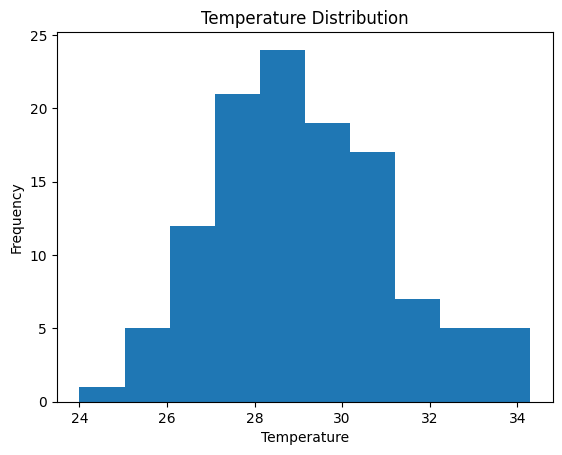

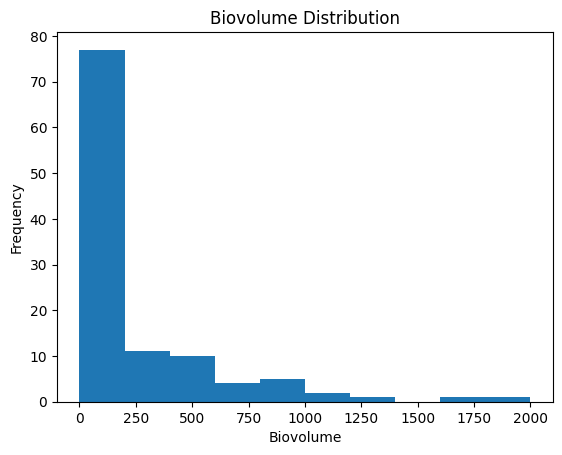

In [1]:
#Final Project: Data Description

#File has been edited to remove the spaces from header (replaced with underscores)

#Characterize the mean, meadian and standard deviation of all variables in your dataset relevant to your hypothesis.

import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress
from sklearn.decomposition import PCA

file=open("epa_everglades_emap_2014_data.tsv")

temp=[] 
temp_adj=[] #temperature but empty cells will be replaced with 0
biovolume=[]
biovolume_adj=[]

count=0
first=True
second=True
for line in file: #reads the first line
    if first==True:
        data=line.split("\t")
        header=data
        first=False
    elif second==True:
        data=line.split("\t")
        subheader=data
        second=False
    else:
        data=line.split("\t")
        temp.append(data[28])
        biovolume.append(data[66])
        if data[28]=='':
            temp_adj.append('29.09') #replaces empty cells with mean values
        else:
            temp_adj.append(data[28]) 
        if data[66]=='':
            biovolume_adj.append('213.839') #replaces empty cells with mean values
        elif data[66]=='N':
            biovolume_adj.append('213.839')
        else:
            biovolume_adj.append(data[66])
        count+=1
        if count>117:
            break        

temp=[x for x in temp if x != '']
biovolume=[x for x in biovolume if x != '']
biovolume=[x for x in biovolume if x != 'N']

temp=np.array(temp, dtype=float)
biovolume=np.array(biovolume, dtype=float)

mean_temp=round(np.mean(temp),3)
median_temp=np.median(temp)
std_temp=round(np.std(temp),3)

mean_biovolume=round(np.mean(biovolume),3)
median_biovolume=np.median(biovolume)
std_biovolume=round(np.std(biovolume),3)

print("The mean of the temperature is",mean_temp)
print("The median of the temperature is", median_temp)
print("The standard deviation of the temperature is", std_temp)
print()
print("The mean of the biovolume is",mean_biovolume)
print("The median of the biovolume is", median_biovolume)
print("The standard deviation of the biovolume is", std_biovolume)

#Create Histograms of each relevant variable.

fig, ax=plt.subplots() #instantiate plot
ax.hist(temp)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
ax.set_title("Temperature Distribution")
plt.show()

fig, ax=plt.subplots() #instantiate plot
ax.hist(biovolume)
ax.set_xlabel("Biovolume")
ax.set_ylabel("Frequency")
ax.set_title("Biovolume Distribution")
plt.show()


The Pearson Correlation Coefficient is: 0.313
The Spearman Correlation Coefficient is: 0.297

Linear Regression Values:
Slope: 54.307
Intercept: -1365.949
R-squared: 0.098
P-value: 0.001
Standard Error: 15.273



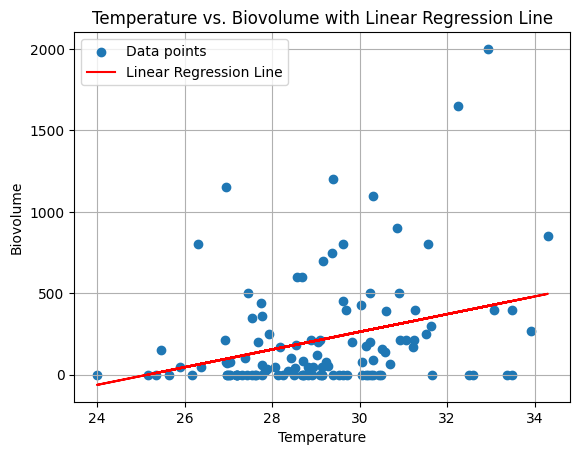

In [2]:
#Final Project: Correlation

#Calculate Pearson and Spearman Correlation Coefficients between key variables relevant to your hypothesis.

temp_adj=np.array(temp_adj, dtype=float)
biovolume_adj=np.array(biovolume_adj, dtype=float)

pearson=stats.pearsonr(temp_adj,biovolume_adj)
spearman=stats.spearmanr(temp_adj,biovolume_adj)

print("The Pearson Correlation Coefficient is:",round(pearson.statistic,3)) #displays the pearson correlation coefficient without the p value
print("The Spearman Correlation Coefficient is:",round(spearman.statistic,3))
print()

#Conduct Linear regression on the above variable sets.

slope, intercept, r_value, p_value, std_err = linregress(temp_adj, biovolume_adj)
print("Linear Regression Values:")
print("Slope:", round(slope,3))
print("Intercept:", round(intercept,3))
print("R-squared:", round(r_value**2,3))
print("P-value:", round(p_value,3))
print("Standard Error:", round(std_err,3))
print()

#Generate scatter plots of real data with linear regression lines overlaid

y= slope * temp_adj + intercept

fig, ax=plt.subplots() #instantiate plot
ax.scatter(temp_adj, biovolume_adj, label="Data points")

ax.plot(temp_adj, y,color="red",label="Linear Regression Line")

ax.set_xlabel("Temperature")
ax.set_ylabel("Biovolume")
ax.set_title("Temperature vs. Biovolume with Linear Regression Line")
ax.legend()
ax.grid(True)

Principle Components:
 [[-1.48836114e+02  1.87936040e+00]
 [-2.13839663e+02 -2.30020284e-02]
 [ 3.86159137e+02 -1.22885654e+00]
 [-2.13841618e+02 -1.10300026e+00]
 [ 1.43616410e+03  5.60891669e-01]
 [ 6.36169116e+02  4.05869459e+00]
 [ 3.61650492e+01  2.35455387e+00]
 [ 9.36155323e+02 -3.83422073e+00]
 [-2.13836822e+02  1.54699540e+00]
 [ 9.86159675e+02 -1.47471263e+00]
 [ 5.86160746e+02 -5.20809866e-01]
 [-1.38393209e+01 -1.49542048e-02]
 [ 3.61979339e-03  2.14999697e+00]
 [-2.13842776e+02 -1.74299921e+00]
 [-4.19836054e-03 -2.16999596e+00]
 [-1.88840265e+02 -3.78245467e-01]
 [ 1.46158119e+02 -1.57451338e+00]
 [-1.13842179e+02 -1.50397568e+00]
 [ 2.16162094e+02  5.58799868e-01]
 [-1.38418184e+01 -1.39495194e+00]
 [-1.63844794e+02 -2.90348535e+00]
 [-2.13832605e+02  3.87699158e+00]
 [-2.13838812e+02  4.46997202e-01]
 [-2.13846015e+02 -3.53299628e+00]
 [-1.63840867e+02 -7.33488906e-01]
 [-2.13841545e+02 -1.06300033e+00]
 [-2.13842649e+02 -1.67299933e+00]
 [-2.13845147e+02 -3.05299707e+0

Text(0.5, 1.0, 'PC1 vs. PC2')

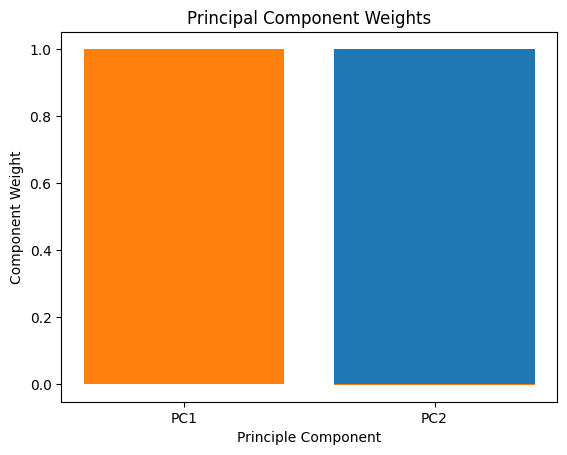

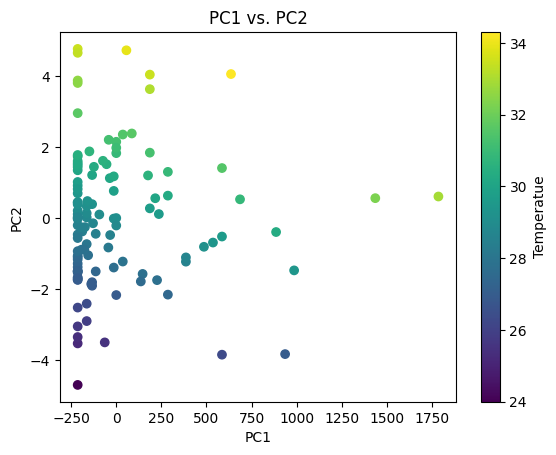

In [3]:
#Final Project: Dimensionality Reduction

#Conduct Principle Components Analysis using all quantitative variables in your data set for across all samples.

file = open("epa_everglades_emap_2014_data.tsv")

count=0
first=True
second=True
list_of_lists=[temp_adj,biovolume_adj]

data=np.array(list_of_lists).T #converts the list to an array

pca=PCA()
result=pca.fit_transform(data)

print("Principle Components:\n",result)

variance=pca.explained_variance_ratio_
print("\nExplained Variance Ratio:",variance)
print()

#Extract principle component weights and plot using a bar chart.

component_weights = pca.components_

fig, ax = plt.subplots()
ax.bar(np.arange(len(component_weights[0])), component_weights[0], label='PC1')
ax.bar(np.arange(len(component_weights[1])), component_weights[1], label='PC2')
plt.xticks(np.arange(component_weights.shape[1]),['PC1','PC2'])
ax.set_xlabel('Principle Component')
ax.set_ylabel('Component Weight')
ax.set_title('Principal Component Weights')


#Visualize your data on PC1 and PC2. Color code data points by relevant categories.

category = np.array(temp_adj) 

norm = plt.Normalize(vmin=min(category), vmax=max(category))
cmap = plt.get_cmap('viridis')

fig, ax = plt.subplots()
scatter = ax.scatter(result[:, 0], result[:, 1], c=category, cmap=cmap, norm=norm)

plt.colorbar(scatter, label='Temperatue')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PC1 vs. PC2")